In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

In [2]:
# Data urls
base_url = '../Naija_daily_report/'
cases = base_url + 'nigeria_covid-19_subnational.csv'
# Import datasets as pandas dataframes
data = pd.read_csv(cases, sep=';', quotechar='"', encoding='utf8')

In [3]:
data.head()

,DATE,ISO_3,PAYS,ID_PAYS,REGION,ID_REGION,Contaminés,Décès,Guéris,Femme,Homme,Genre_non spécifié,Source,Lien Sourc
0,27/02/2020,NGA,Nigéria,15.0,Abia,170.0,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control,https://ncdc.gov.ng/diseases/sitreps/?cat=14&n...
1,27/02/2020,NGA,Nigéria,15.0,Adamawa,171.0,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control,https://ncdc.gov.ng/diseases/sitreps/?cat=14&n...
2,27/02/2020,NGA,Nigéria,15.0,Akwa Ibom,172.0,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control,https://ncdc.gov.ng/diseases/sitreps/?cat=14&n...
3,27/02/2020,NGA,Nigéria,15.0,Anambra,173.0,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control,https://ncdc.gov.ng/diseases/sitreps/?cat=14&n...
4,27/02/2020,NGA,Nigéria,15.0,Bauchi,174.0,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control,https://ncdc.gov.ng/diseases/sitreps/?cat=14&n...


In [4]:
data.columns

Index(['DATE', 'ISO_3', 'PAYS', 'ID_PAYS', 'REGION', 'ID_REGION', 'Contaminés',
       'Décès', 'Guéris', 'Femme', 'Homme', 'Genre_non spécifié', 'Source',
       'Lien Sourc'],
      dtype='object')

In [5]:
data.columns = ['Date', 'Abr', 'Country', 'Country_Id', 'State', 'State_id', 'Infected',
               'Death', 'Recovered', 'Female', 'Male', 'Gender_non_specified', 'Source', 'Source_link']

In [6]:
data.head()

,Date,Abr,Country,Country_Id,State,State_id,Infected,Death,Recovered,Female,Male,Gender_non_specified,Source,Source_link
0,27/02/2020,NGA,Nigéria,15.0,Abia,170.0,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control,https://ncdc.gov.ng/diseases/sitreps/?cat=14&n...
1,27/02/2020,NGA,Nigéria,15.0,Adamawa,171.0,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control,https://ncdc.gov.ng/diseases/sitreps/?cat=14&n...
2,27/02/2020,NGA,Nigéria,15.0,Akwa Ibom,172.0,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control,https://ncdc.gov.ng/diseases/sitreps/?cat=14&n...
3,27/02/2020,NGA,Nigéria,15.0,Anambra,173.0,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control,https://ncdc.gov.ng/diseases/sitreps/?cat=14&n...
4,27/02/2020,NGA,Nigéria,15.0,Bauchi,174.0,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control,https://ncdc.gov.ng/diseases/sitreps/?cat=14&n...


In [7]:
data.columns

Index(['Date', 'Abr', 'Country', 'Country_Id', 'State', 'State_id', 'Infected',
       'Death', 'Recovered', 'Female', 'Male', 'Gender_non_specified',
       'Source', 'Source_link'],
      dtype='object')

In [8]:
data.drop([ 'Abr', 'Country','Country_Id', 'State_id', 'Source', 'Source_link'], axis=1, inplace=True)

In [18]:
# Group by state (also drop 'country', 'abr', country_id, state_id, source and soure_link as it doesn't make sense to sum them here)
data_state = data.groupby('State').sum().reset_index()
data_state.head()

,State,Infected,Death,Recovered,Female,Male,Gender_non_specified
0,Abia,405.0,3.0,295.0,0.0,0.0,405.0
1,Adamawa,110.0,7.0,71.0,0.0,0.0,110.0
2,Akwa Ibom,145.0,3.0,71.0,0.0,0.0,145.0
3,Anambra,93.0,9.0,65.0,0.0,0.0,93.0
4,Bauchi,521.0,13.0,505.0,0.0,0.0,521.0


In [19]:
data_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 38 non-null     object 
 1   Infected              38 non-null     float64
 2   Death                 38 non-null     float64
 3   Recovered             38 non-null     float64
 4   Female                38 non-null     float64
 5   Male                  38 non-null     float64
 6   Gender_non_specified  38 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.2+ KB


# Relating the variables with scatterplots 

### Infected cases compared to recovered cases per state

In [28]:
data['Date']

0       27/02/2020
1       27/02/2020
2       27/02/2020
3       27/02/2020
4       27/02/2020
           ...    
5202    12/07/2020
5203    12/07/2020
5204    12/07/2020
5205    12/07/2020
5206           NaN
Name: Date, Length: 5207, dtype: object

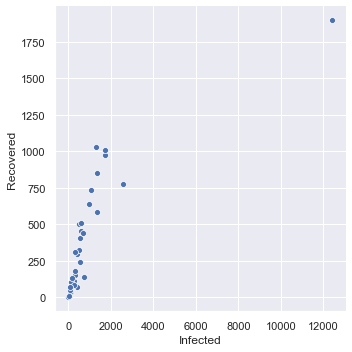

In [20]:
sns.relplot(x = 'Infected', y = 'Recovered', data = data_state)

### Number of infected per state

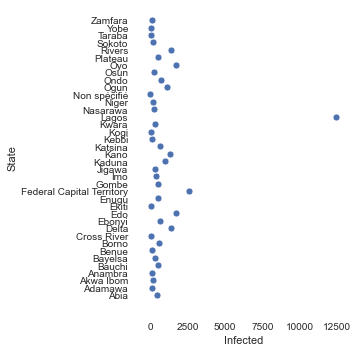

In [32]:
sns.relplot(x = 'Infected', y = 'State', data = data_state)

### Death rate compare to Infected 

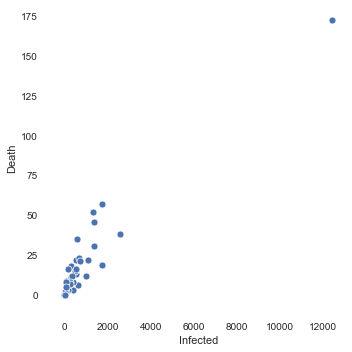

In [36]:
sns.relplot(y = 'Death', x = 'Infected',  data = data_state)

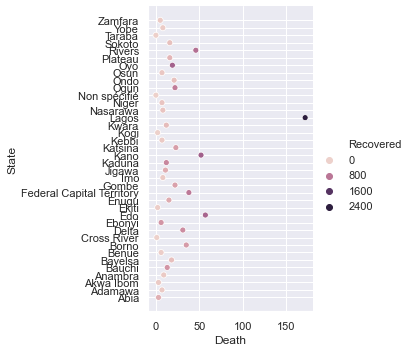

In [22]:
sns.relplot(x = 'Death', y = 'State', hue = 'Recovered', data = data_state)

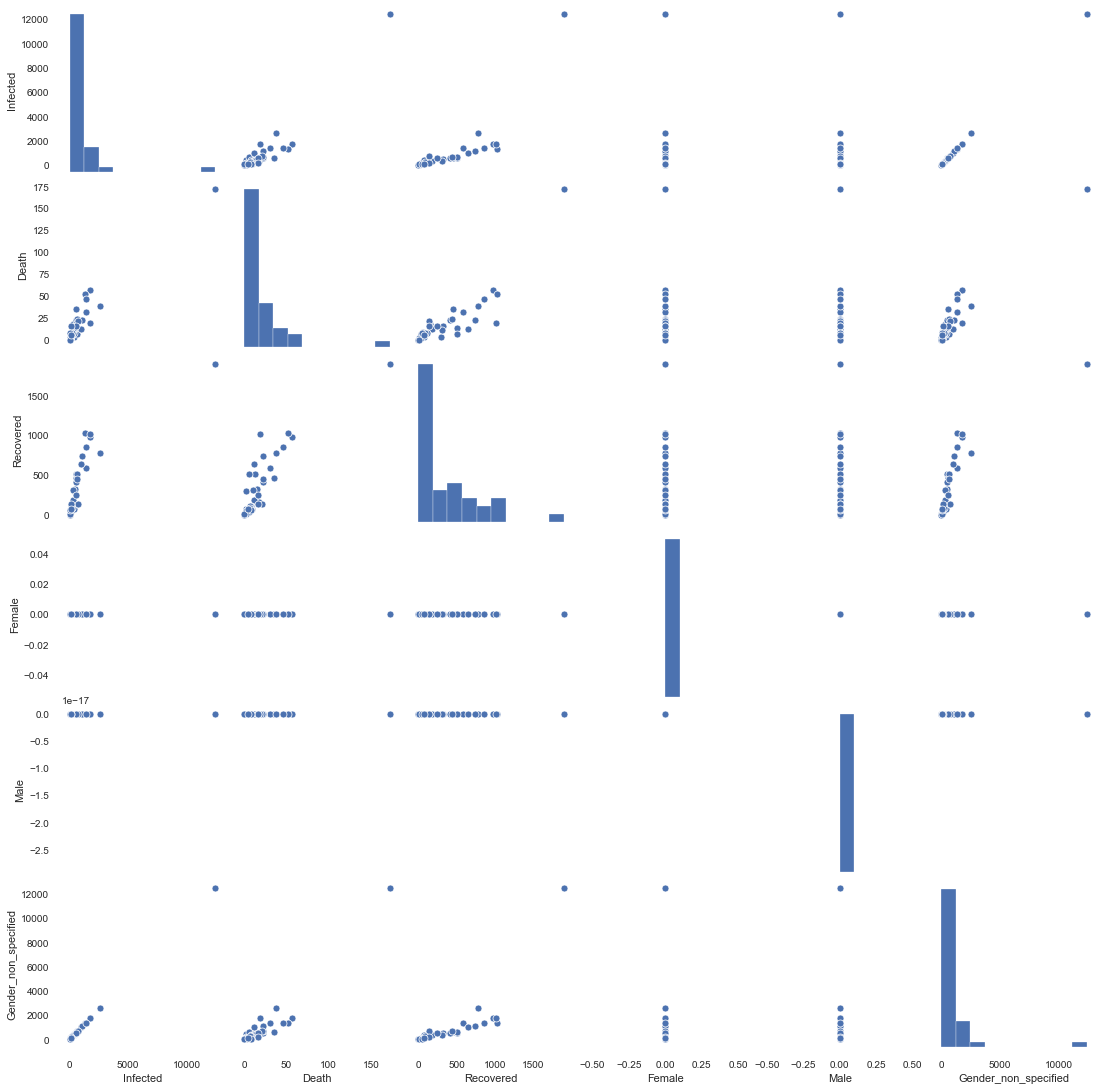

In [37]:
sns.pairplot(data_state)

In [33]:
import IPython
import ipywidgets

from pandas_profiling import ProfileReport
profile = ProfileReport(data_state, title='Pandas Analysis', explorative=True)
profile.to_file('output.html')